In [1]:
import pandas as pd
from scipy.stats import gamma

fan_surface_df = pd.read_csv('fan_surface_slope_gs.csv')
fan_surface_df

fan surface  slope_25  slope_50  slope_75   D25   D50    D75    D90     n
0    HP      Q4  0.066420  0.075190  0.087489  15.0  38.0   62.0   87.0  2300
1    HP      Q3  0.072998  0.082215  0.088368  46.0  72.0  113.0  162.0  1898
2    HP      Q2  0.083094  0.087489  0.090127  49.0  29.0   75.0  109.0  1101
3    GC      Q4  0.059411  0.091007  0.101576  26.0  48.0   73.0  106.1  2903
4    GC      Q3  0.091007  0.103340  0.106869  42.0  68.0  105.0  152.0  2093
5    GC      Q2  0.082215  0.096289  0.103340  48.0  30.0   75.0  113.0  1501
6   SO1      Q4  0.085730  0.094528  0.098051  18.0  37.0   65.0  100.0  3099
7   SO1      Q3  0.089687  0.101577  0.108635  25.0  52.0   97.0  161.0  3206
8   SO1      Q2  0.105104  0.113936  0.126329  20.0  30.0   55.0   76.0  1514
9   SO2      Q4  0.061163  0.067297  0.069927  20.0  40.0   63.0   94.0  3026
10  SO2      Q3  0.070365  0.073436  0.083972  25.0  50.0   76.0  112.0  1000
11  SO2      Q2  0.080458  0.087489  0.092767  24.0  43.0   68.0  102.0  1723

Maximum water discharge $Q_{max}$ can be described by:

\begin{equation}
    Q_{max} = cPA
\end{equation}

where $c$ is an environmental coefficient, $P$ is precipitation and $A$ is catchment area.


$Q$ can also be calculated hydraulically:

\begin{equation}
    Q = UWH
\end{equation}


where $U$ is velocity, $W$ is channel width and $H$ is channel depth


$u^*$ shear velocity can be calculated by:

\begin{equation}
    u^* = \sqrt{\frac{\tau_b}{\rho}}
\end{equation}

where $\tau_b$ can be approximated by

\begin{equation}
    \tau_b = HS
\end{equation}

where $H$ is flow depth and $S$ is slope.

$Cz$ = dimensionless Chezy resistance coefficient:

\begin{equation}
    Cz = \frac{U}{u^*} = C_f^{-1/2}
\end{equation}

Where $C_f$ is a dimensionless bed resistance coefficient that can be approximated using $D_{84}$ and flow depth $H$:

\begin{equation}
    Cf \approx f\left( \frac{D_{90}}{H} \right)
\end{equation}


### Estimating Precip Max

\begin{equation}
    \left[ \frac{P_H}{P_P} \right]_{max} = \left( \frac{Q_H}{Q_P} \right) = \left( \frac{U_H W_H H_H}{U_P W_P H_P} \right)
\end{equation}




In [2]:
# Fan Areas

HP_AREA = 66240278.4
GC_AREA = 11549089.64
SO1_AREA = 6463610.781
SO2_AREA = 9642230.604

areas = {
    'HP':HP_AREA,
    'GC':GC_AREA,
    'SO1':SO1_AREA,
    'SO2':SO2_AREA
}

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

0.5844379183813879


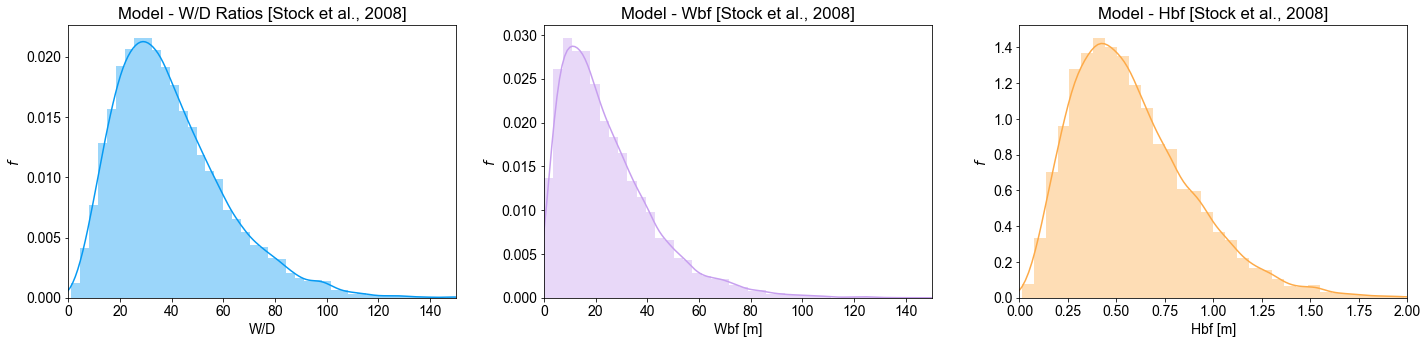

In [3]:
# Create PDFs from Stock et al. fan depths
import os
import pickle
import numpy as np
import seaborn as sns
from numpy import genfromtxt
import matplotlib.pyplot as plt 
import matplotlib as mpl

os.makedirs('./figures', exist_ok=True)

font = {'family' : 'arial',
        'size'   : 14}

mpl.rc('font', **font)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

n = 10000

with open("stock_gamma_fits.pkl", 'rb') as gf:  
    stock_gamma_dists = pickle.load(gf)


wd_random_sample = np.random.gamma(stock_gamma_dists['wd_gamma'][0], stock_gamma_dists['wd_gamma'][2], n)
wbf_random_sample = np.random.gamma(stock_gamma_dists['wb_gamma'][0], stock_gamma_dists['wb_gamma'][2], n)
hbf_random_sample = np.random.gamma(stock_gamma_dists['hb_gamma'][0], stock_gamma_dists['hb_gamma'][2], n)

sns.distplot(wd_random_sample, hist=True, ax=ax[0], color=sns.xkcd_rgb['azure'], label='Inactive')
sns.distplot(wbf_random_sample, hist=True, ax=ax[1], color=sns.xkcd_rgb['lavender'], label='Inactive')
sns.distplot(hbf_random_sample, hist=True, ax=ax[2], color=sns.xkcd_rgb['light orange'], label='Inactive')

print(np.mean(hbf_random_sample))

ax[0].set_title('Model - W/D Ratios [Stock et al., 2008]')
ax[1].set_title('Model - Wbf [Stock et al., 2008]')
ax[2].set_title('Model - Hbf [Stock et al., 2008]')

ax[0].set_xlabel('W/D')
ax[1].set_xlabel('Wbf [m]')
ax[2].set_xlabel('Hbf [m]')


ax[0].set_ylabel('$f$')
ax[1].set_ylabel('$f$')
ax[2].set_ylabel('$f$')


ax[0].set_xlim([0, 150])
ax[1].set_xlim([0, 150])
ax[2].set_xlim([0, 2])

fig.tight_layout()
fig.savefig('figures/Stock_2008.pdf')
plt.show()



## Water Discharges Estimated Using Stock et al., 2008 Widths

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Fan :GC Surface: Q2
Q3 discharge is 1.42x Q4 median discharge
Q2 discharge is 0.82x Q4 median discharge




/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Fan :HP Surface: Q2
Q3 discharge is 1.61x Q4 median discharge
Q2 discharge is 1.1x Q4 median discharge




/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Fan :SO1 Surface: Q2
Q3 discharge is 1.48x Q4 median discharge
Q2 discharge is 0.57x Q4 median discharge




/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Fan :SO2 Surface: Q2
Q3 discharge is 1.26x Q4 median discharge
Q2 discharge is 1.14x Q4 median discharge




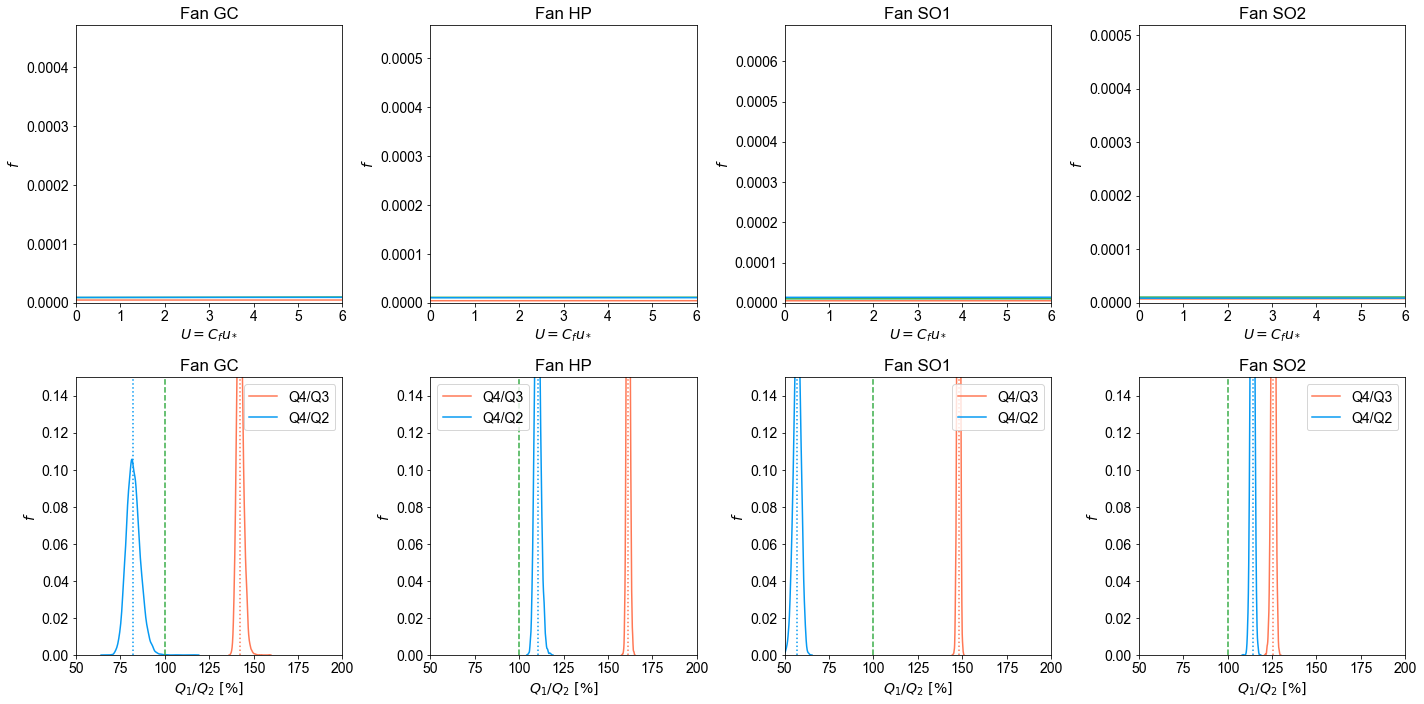

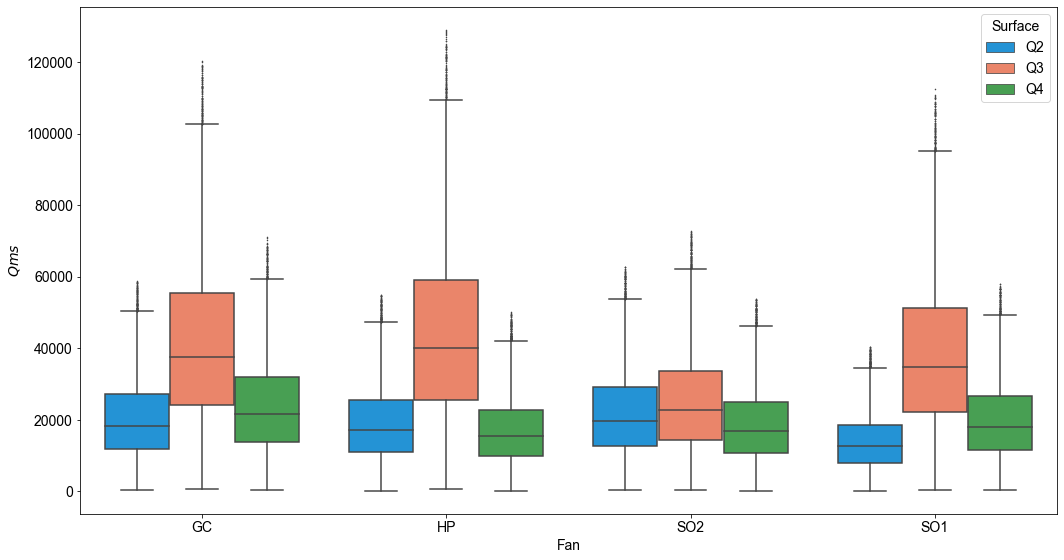

Average IQR discharge of Q4_Q3 =1.47
Average IQRdischarge of Q4_Q2 =2.85
Average median discharge of Q4_Q3 =144.39
Average median discharge of Q4_Q2 =90.91


In [4]:
import pandas as pd

g = 9.78
rho_1 = 1650
rho_2 = 1000
g = 9.78
tc = 0.03

WD_power_law = [40.73466824, 1.10273682]

def estimate_Wbf(hbf, a, b):
    return a*np.power(hbf,b)

def estimate_tc(S):
    # Lamb et al., 2008
    return np.power(0.15*S, 0.25)

fan_surface_by_fan = fan_surface_df.groupby('fan')
fan_Q_combined = {}

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20,10))

IQR_Q4_Q3_all = []
IQR_Q4_Q2_all = []

Median_Q4_Q3_all = []
Median_Q4_Q2_all = []

inc = 0
for fan in fan_surface_by_fan.groups:
     
    idxs = fan_surface_by_fan.groups[fan]
    fan_surfaces = fan_surface_df.loc[idxs].iterrows()
    
#     fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

    fan_dfs = {}
    
    for rid, row in fan_surfaces:
        
        slope_model_std_1 = row['slope_75']-row['slope_50']
        slope_model_std_2 = row['slope_50']-row['slope_25']
        slope_model_std_av = np.mean([slope_model_std_1, slope_model_std_2])
    
    #     sns.distplot(slope_samples, hist=True, color=sns.xkcd_rgb['azure'], label='Inactive')
    #     plt.show()
        hbf = hbf_random_sample.copy()
        hbf = pd.Series(hbf)
        hbf = hbf[hbf<1.5]
        
        
        slope_samples = np.random.normal(row['slope_50'], slope_model_std_av, len(hbf))

        Q_table = pd.DataFrame(data={'Hbf':hbf, 'S':slope_samples})
        Q_table['Surface'] = row['surface']
        Q_table['Wbf'] = estimate_Wbf(hbf, WD_power_law[0], WD_power_law[1])
        Q_table['D50'] = row['D50']/1000
        Q_table['D90'] = row['D90']/1000
        Q_table['tc'] = estimate_tc(Q_table['S'])
        Q_table['Cf'] = np.power((2*np.log10(Q_table['Hbf']/Q_table['D90'])+1),-2)
        Q_table['Tb_r'] = Q_table['tc']*(rho_1-rho_2)*g*row['D50']
        Q_table['u*_r'] = np.sqrt(Q_table['Tb_r']/1000)
        Q_table['Cf_r'] = row['D90']/Q_table['Hbf']
        Q_table['U_r'] = Q_table['Cf_r']*Q_table['u*_r']
        Q_table['Qms_r'] = Q_table['U_r']*Q_table['Wbf']*Q_table['Hbf']
        #sns.distplot(Q_table['U'], hist=False, label=row['surface'])
        
        if row['surface'] == 'Q4':
            dist_color=sns.xkcd_rgb['medium green']
            
        if row['surface'] == 'Q3':
            dist_color=sns.xkcd_rgb['melon']
        
        if row['surface'] == 'Q2':
            dist_color=sns.xkcd_rgb['azure']
            
        sns.distplot(Q_table['U_r'], hist=False, label=row['surface'], ax=ax[0][inc], color=dist_color)
        
        fan_dfs[row['surface']] = Q_table
        
    ax[0][inc].set_title('Fan '+fan)
    ax[0][inc].set_xlabel('$U = C_f u_*$')
    ax[0][inc].set_ylabel('$f$')
    ax[0][inc].set_xlim([0,6])
    
    # Calculate Surface-to-surface changes
    Qms_Q2 = fan_dfs['Q2']['Qms_r']
    Qms_Q3 = fan_dfs['Q3']['Qms_r']
    Qms_Q4 = fan_dfs['Q4']['Qms_r']
    
    fan_dfs['Q2']['Qms_Q_A_r'] = Qms_Q2/areas[fan]
    fan_dfs['Q3']['Qms_Q_A_r'] = Qms_Q3/areas[fan]
    fan_dfs['Q4']['Qms_Q_A_r'] = Qms_Q4/areas[fan]
    
    fan_dfs_combined = fan_dfs['Q2']
    fan_dfs_combined = fan_dfs_combined.append(fan_dfs['Q3'], ignore_index=False)
    fan_dfs_combined = fan_dfs_combined.append(fan_dfs['Q4'], ignore_index=False)
    fan_dfs_combined['Fan'] = fan
    
    fan_Q_combined[fan] = fan_dfs_combined

    Q4_Q3 = 200+(Qms_Q4/Qms_Q3)*-100
    Q4_Q2 = 200+(Qms_Q4/Qms_Q2)*-100
    
    ax[1][inc].set_title('Fan '+fan)
    
    sns.distplot(Q4_Q3, hist=False, label=row['surface'], color=sns.xkcd_rgb['melon'], ax=ax[1][inc])
    sns.distplot(Q4_Q2, hist=False, label=row['surface'], color=sns.xkcd_rgb['azure'], ax=ax[1][inc])
    ax[1][inc].legend(['Q4/Q3','Q4/Q2'])
    ax[1][inc].set_xlabel('$Q_1/Q_2~[\%]$')
    ax[1][inc].set_ylabel('$f$')
    ax[1][inc].set_xlim([50, 200])
    ax[1][inc].set_ylim([0, 0.15])
    median_Q4_Q3 = np.median(Q4_Q3)
    median_Q4_Q2 = np.median(Q4_Q2)
    quartiles_Q4_Q3 = np.quantile(Q4_Q3, [.25, .75])
    quartiles_Q4_Q2 = np.quantile(Q4_Q2, [.25, .75])
    
    IQR_Q4_Q3 = quartiles_Q4_Q3[1]-quartiles_Q4_Q3[0]
    IQR_Q4_Q2 = quartiles_Q4_Q2[1]-quartiles_Q4_Q2[0]
    
    IQR_Q4_Q3_all.append(IQR_Q4_Q3)
    IQR_Q4_Q2_all.append(IQR_Q4_Q2)
    Median_Q4_Q3_all.append(median_Q4_Q3)
    Median_Q4_Q2_all.append(median_Q4_Q2)

    ax[1][inc].plot([100,100], [0, 0.15], '--', color=sns.xkcd_rgb['medium green'])
    ax[1][inc].plot([median_Q4_Q3,median_Q4_Q3], [0, 0.15], ':', color=sns.xkcd_rgb['melon'])
    ax[1][inc].plot([median_Q4_Q2,median_Q4_Q2], [0, 0.15], ':', color=sns.xkcd_rgb['azure'])
    
    print('Fan :'+row['fan']+' Surface: '+row['surface'])
    print('Q3 discharge is '+str(round(median_Q4_Q3/100,2))+'x Q4 median discharge')
    print('Q2 discharge is '+str(round(median_Q4_Q2/100,2))+'x Q4 median discharge')
    print("\n")
    
    inc = inc+1

fan_Q_combined_data = fan_Q_combined['GC']
fan_Q_combined_data = fan_Q_combined_data.append(fan_Q_combined['HP'], ignore_index=False)
fan_Q_combined_data = fan_Q_combined_data.append(fan_Q_combined['SO2'], ignore_index=False)
fan_Q_combined_data = fan_Q_combined_data.append(fan_Q_combined['SO1'], ignore_index=False)

fig3, ax3 = plt.subplots(nrows=1, ncols=1, figsize=(15,8))
surface_palette = [sns.xkcd_rgb['azure'], sns.xkcd_rgb['melon'], sns.xkcd_rgb['medium green']]
sns.boxplot(x="Fan", y="Qms_r", hue="Surface", data=fan_Q_combined_data, palette=surface_palette, fliersize=0.7, ax=ax3)
ax3.set_ylabel('$Qms$')

fig.tight_layout()
fig3.tight_layout()

fig.savefig('./figures/U_Qms_ratio_fans.pdf')
fig3.savefig('./figures/Qms_fan.pdf')
plt.show()

print('Average IQR discharge of Q4_Q3 ='+str(round(np.mean(IQR_Q4_Q3_all),2)))
print('Average IQRdischarge of Q4_Q2 ='+str(round(np.mean(IQR_Q4_Q2_all),2)))

print('Average median discharge of Q4_Q3 ='+str(round(np.mean(Median_Q4_Q3_all),2)))
print('Average median discharge of Q4_Q2 ='+str(round(np.mean(Median_Q4_Q2_all),2)))


In [5]:
ps = 1680
pf = 1000
g = 9.78

def bed_shear_stress(row):
    return row['tc']*(ps-pf)*g*row['D50']

def entrainment_depth(row):
    return row['tb']/(pf*g*row['S'])


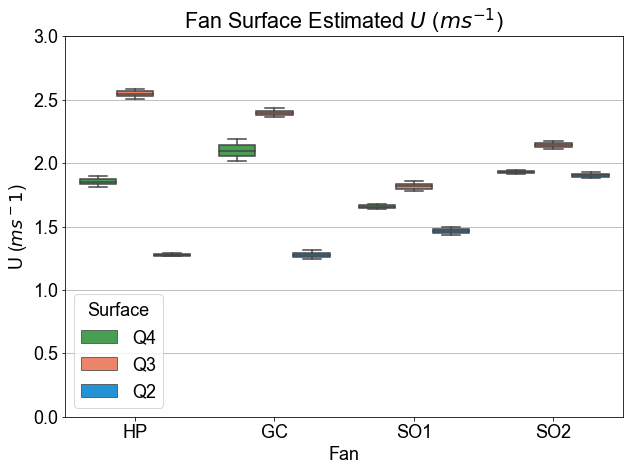

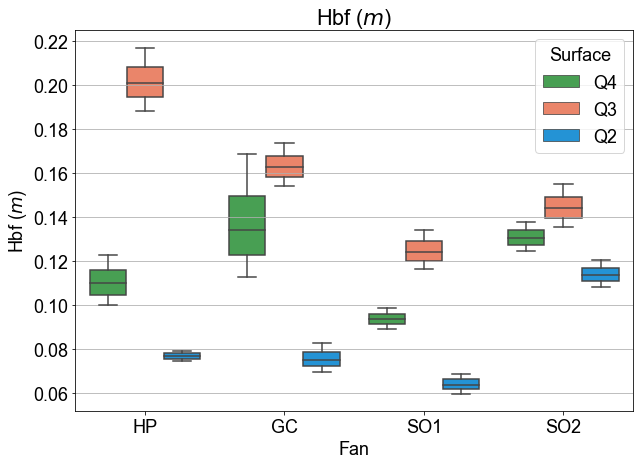

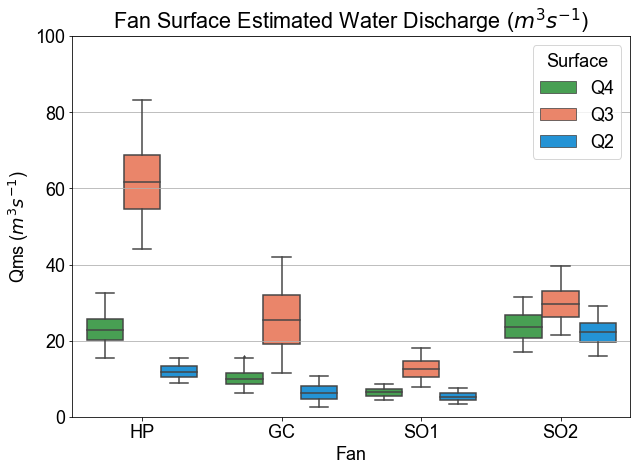

In [8]:
import matplotlib.pyplot as plt 
import matplotlib as mpl
import os
import seaborn as sns

font = {'family' : 'arial',
        'size'   : 18}

mpl.rc('font', **font)

import pickle
import pandas as pd
import numpy as np

fan_surface_df = pd.read_csv('fan_surface_slope_gs.csv')
fan_surface_by_fan = fan_surface_df.groupby('fan')

field_widths = pickle.load( open( "field_widths.p", "rb" ) )

with open("stock_gamma_fits.pkl", 'rb') as gf:  
    stock_gamma_dists = pickle.load(gf)
    
n = 2000

surfaces = ['Q4', 'Q3', 'Q2']
surfaces_alt = ['Q4', 'Q3b', 'Q2c']

rho = 1000
g = 9.78

# Ferguson et al., 2007
a1 = 7.5
a2 = 2.36

surface_dfs = pd.DataFrame(columns=['Wbf', 'S', 'Hbf', 'W/D', 'R', 'D50', 'D75', 'D90',
                                   'Tb_r', 'u*', 'Cf', 'U_est1', 'U_est2', 'U_est3',
                                   'qbf_est1', 'qbf_est2', 'qbf_est3',
                                   'Qbf_est1', 'Qbf_est2', 'Qbf_est3', 'Fan', 'Surface'])

for idx, fn in enumerate(field_widths):
    widths = field_widths[fn]
    idxs = fan_surface_by_fan.groups[fn]
    fan_surfaces = fan_surface_df.loc[idxs]
        
    for sidx, s in enumerate(surfaces):
        
        gs_data = fan_surfaces.loc[fan_surfaces['surface']==s]
        D90 = gs_data.D90.iloc[0]
        D75 = gs_data.D75.iloc[0]
        D50 = gs_data.D50.iloc[0]
        slope = gs_data.slope_50.iloc[0]
        slope_25 = gs_data.slope_25.iloc[0]
        slope_75 = gs_data.slope_75.iloc[0]
        width_samples = np.random.uniform(low=widths[s][0], high=widths[s][1], size=n)
        slope_samples = np.random.uniform(low=slope_25, high=slope_75, size=n)
        
        depths = np.random.uniform(low=0.5, high=1.5, size=n)
        
        # est1 = peak flood estimates using guesses for flow velocities and depth
        # est2 = flood estimates using guesses for grain size and depth
        # est3 = Ferguson, 2007
        qms_df = pd.DataFrame({'Wbf':width_samples})
        qms_df['S'] = slope_samples
        qms_df['tc'] = estimate_tc(qms_df['S'])
        qms_df['D50'] = D50/1000
        qms_df['D75'] = D75/1000
        qms_df['D90'] = D90/1000
        qms_df['tb'] = qms_df.apply(bed_shear_stress, axis=1)
        qms_df['Hbf'] = qms_df.apply(entrainment_depth, axis=1)
        qms_df['W/D'] = qms_df['Wbf']/qms_df['Hbf']
        qms_df['R'] = ((2*qms_df['Hbf'])+qms_df['Wbf'])/(qms_df['Hbf']*qms_df['Wbf'])
                
        qms_df['Tb_r'] = qms_df['tc']*(rho_1-rho_2)*g*(D50/1000)
        qms_df['u*'] = np.sqrt(qms_df['Tb_r']/1000)
        
        von_Karman = 0.4
        qms_df['U_est2'] = ((1/von_Karman)*np.log(11*qms_df['Hbf']/(D90/1000)))*qms_df['u*']
        
        # Ferguson et al., 2007 VPE equation

        relative_submergence = qms_df['Hbf']/qms_df['D90']
        V = a1*a2*relative_submergence/np.power((np.power(a1,2)+np.power(a2,2)*np.power(relative_submergence, 5/3)),1/2)
        qms_df['U_est3'] = V

        
        qms_df['qbf_est2'] = qms_df['U_est2']*qms_df['Hbf']
        qms_df['qbf_est3'] = qms_df['U_est3']*qms_df['Hbf']
        
        qms_df['Qbf_est2'] = qms_df['U_est2']*qms_df['Wbf']*qms_df['Hbf']
        qms_df['Qbf_est3'] = qms_df['U_est3']*qms_df['Wbf']*qms_df['Hbf']
        
        qms_df['Surface'] = s
        qms_df['Fan'] = fn
        
        surface_dfs = surface_dfs.append(qms_df)


surface_dfs.to_csv('DV_Surface_QMS.csv')

# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,7))

# surface_palette = [sns.xkcd_rgb['medium green'], sns.xkcd_rgb['melon'], sns.xkcd_rgb['azure']]
# sns.boxplot(x="Fan", y="U_est1", hue="Surface", data=surface_dfs, palette=surface_palette, fliersize=0.7, ax=ax)
# ax.set_ylabel('U [m/s]')
# ax.set_ylim([0,7])
# ax.set_title('Velocities (scenario 1, guessed depth (~1m) and velocities (~1m/s)))')

# plt.show()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))

surface_palette = [sns.xkcd_rgb['medium green'], sns.xkcd_rgb['melon'], sns.xkcd_rgb['azure']]
sns.boxplot(x="Fan", y="U_est2", hue="Surface", data=surface_dfs, palette=surface_palette, fliersize=0.7, ax=ax)
ax.set_ylabel('U ($ms^-1$)')
ax.set_ylim([0,3])
ax.set_title('Fan Surface Estimated $U$ ($ms^{-1}$)')
ax.grid(axis='y')
plt.show()

# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

# surface_palette = [sns.xkcd_rgb['medium green'], sns.xkcd_rgb['melon'], sns.xkcd_rgb['azure']]
# bxp = sns.boxplot(x="Fan", y="U_est3", hue="Surface", data=surface_dfs, palette=surface_palette, fliersize=0.7, ax=ax)
# ax.set_ylabel('U [m/s]')
# ax.set_ylim([0,5])
# bxp.legend(loc='lower right')
# ax.set_title('Velocities (Depths between 0.5-1.5 m, U estimated from Ferguson et al., 2007)')
# plt.show()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))

surface_palette = [sns.xkcd_rgb['medium green'], sns.xkcd_rgb['melon'], sns.xkcd_rgb['azure']]
sns.boxplot(x="Fan", y="Hbf", hue="Surface", data=surface_dfs, palette=surface_palette, fliersize=0.7, ax=ax)
ax.set_ylabel('Hbf ($m$)')

ax.set_title('Hbf ($m$)')
ax.grid(axis='y')
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))

surface_palette = [sns.xkcd_rgb['medium green'], sns.xkcd_rgb['melon'], sns.xkcd_rgb['azure']]
sns.boxplot(x="Fan", y="Qbf_est2", hue="Surface", data=surface_dfs, palette=surface_palette, fliersize=0.7, ax=ax)
ax.set_ylabel('Qms ($m^3s^{-1}$)')
ax.set_ylim([0,100])

ax.set_title('Fan Surface Estimated Water Discharge ($m^3s^{-1}$)')
ax.grid(axis='y')
plt.show()

# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,7))

# surface_palette = [sns.xkcd_rgb['medium green'], sns.xkcd_rgb['melon'], sns.xkcd_rgb['azure']]
# bxp = sns.boxplot(x="Fan", y="Qbf_est3", hue="Surface", data=surface_dfs, palette=surface_palette, fliersize=0.7, ax=ax)
# ax.set_ylabel('Qms [$m^3/s$]')
# ax.set_ylim([0,100])
# ax.set_title('Qms (Depths between 0.5-1.5 m, U estimated from Ferguson et al., 2007)')
# plt.show()


(array([191., 220., 218., 189., 211., 198., 190., 203., 179., 201.]),
 array([0.10826157, 0.10948013, 0.11069869, 0.11191725, 0.11313581,
        0.11435437, 0.11557294, 0.1167915 , 0.11801006, 0.11922862,
        0.12044718]),
 <BarContainer object of 10 artists>)

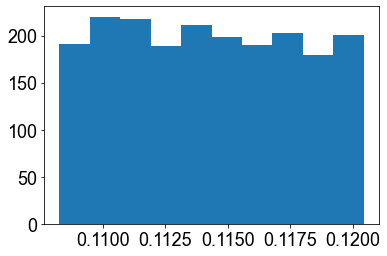

In [7]:
plt.hist(qms_df['Hbf'])